--- Step 1: Installing and importing libraries ---
Libraries installed and imported successfully.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Step 2: Loading and Preprocessing Data ---
Loading pre-processed data from /content/drive/MyDrive/DeepLearning/DL_Research_Project/outputs/mitdb_attention_model_v1/processed_demographic_data.npz
Loaded data. Training shape: (44365, 180, 1)

--- Step 3: Building the CNN-LSTM with Attention Model ---


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 180, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 180, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 90, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 90, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 90, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 90, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 45, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer (Attention)     │ [(None, 128), (None,   │        16,640 │
│                                 │ 45)]                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ main_output (Dense)             │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,595 (682.01 KB)

 Trainable params: 174,211 (680.51 KB)

 Non-trainable params: 384 (1.50 KB)


--- Step 4: Compiling and Training the Attention Model ---
Epoch 1/20
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 164s 125ms/step - loss: 0.2285 - main_output_accuracy: 0.9375 - val_loss: 0.1080 - val_main_output_accuracy: 0.9705
Epoch 2/20
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - loss: 0.1086 - main_output_accuracy: 0.9710 - val_loss: 0.0872 - val_main_output_accuracy: 0.9736
Epoch 3/20
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 164s 132ms/step - loss: 0.0857 - main_output_accuracy: 0.9764 - val_loss: 0.0652 - val_main_output_accuracy: 0.9808
Epoch 4/20
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 158s 126ms/step - loss: 0.0688 - main_output_accuracy: 0.9822 - val_loss: 0.0940 - val_main_output_accuracy: 0.9788
Epoch 5/20
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - loss: 0.0670 - main_output_accuracy: 0.9821 - val_loss: 0.0902 - val_main_output_accuracy: 0.9741
Epoch 6/20
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - loss: 0.0635 - main_output_accuracy: 0.9830 - val_loss: 0.0569 - val_main_output_accuracy:

KeyError: 'accuracy'

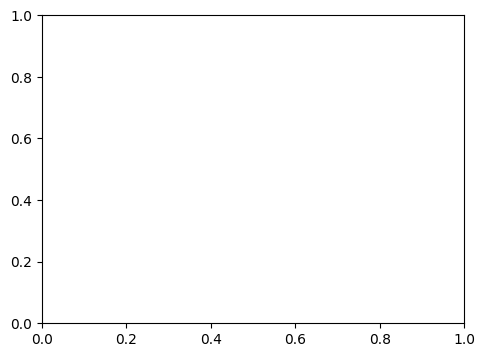

In [ ]:
# ==============================================================================
# STEP 1: SETUP - INSTALL AND IMPORT LIBRARIES
# ==============================================================================
print("--- Step 1: Installing and importing libraries ---")
!pip install --upgrade numpy pandas scikit-learn tensorflow shap wfdb matplotlib --quiet

import os
import re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import wfdb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Layer
from google.colab import drive

print("Libraries installed and imported successfully.")
drive.mount('/content/drive')

# ==============================================================================
# STEP 2: DATA LOADING & PREPROCESSING (Reusing previous robust functions)
# ==============================================================================

def load_ecg_data(record_path):
    """Loads ECG record, annotations, and demographic data."""
    try:
        record = wfdb.rdrecord(record_path)
        annotation = wfdb.rdann(record_path, 'atr')
    except Exception as e:
        print(f"Error loading record {record_path}: {e}")
        return None, None, None, None, None, None

    # --- Extract Age and Sex from comments ---
    age, sex = 'N/A', 'N/A'
    if record.comments:
        for comment in record.comments:
            # Typical format is 'age sex ...' e.g., '69 M ...'
            match = re.search(r'(\d+)\s+([MF])', comment)
            if match:
                age = int(match.group(1))
                sex = match.group(2)
                break

    # --- Find a suitable ECG lead ---
    ecg_lead_names = ['MLII', 'II', 'V1', 'V2', 'V5', 'V']
    ecg_channel_index = -1
    selected_lead = None
    for name in ecg_lead_names:
        if name in record.sig_name:
            ecg_channel_index = record.sig_name.index(name)
            selected_lead = name
            break

    if ecg_channel_index == -1:
        return None, None, None, None, None, None

    signal = record.p_signal[:, ecg_channel_index]
    if np.std(signal) < 1e-6:
        return None, None, None, None, None, None

    return record, signal, annotation, selected_lead, age, sex

print("--- Step 2: Loading and Preprocessing Data ---")

# --- Configuration ---
BASE_DATA_DIR = '/content/drive/MyDrive/DeepLearning/DL_Research_Project/dataset/MIT_BIH_Arrhythmia_Database'
SAVE_DIR = '/content/drive/MyDrive/DeepLearning/DL_Research_Project/outputs/mitdb_attention_model_v1'
os.makedirs(SAVE_DIR, exist_ok=True)

# Define file path for processed data
processed_data_path = os.path.join(SAVE_DIR, 'processed_demographic_data.npz')

# --- Data Aggregation and Preprocessing ---
# Check if data is already processed to save time
if os.path.exists(processed_data_path):
    print(f"Loading pre-processed data from {processed_data_path}")
    data = np.load(processed_data_path)
    X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']
    age_train, age_test, sex_train, sex_test = data['age_train'], data['age_test'], data['sex_train'], data['sex_test']
    print(f"Loaded data. Training shape: {X_train.shape}")
else:
    print("Processed data not found. Starting full preprocessing...")
    PATIENT_IDS = ['100', '101', '106', '108', '109', '112', '114', '115', '116', '118', '119', '122', '124', '200', '201', '203', '205', '207', '208', '209', '215', '220', '223', '230']
    all_X, all_y, all_ages, all_sexes = [], [], [], []
    window_before, window_after = 90, 90
    target_symbols = {
        'N': 0, 'L': 0, 'R': 0, 'e': 0, 'j': 0,
        'A': 1, 'a': 1, 'J': 1, 'S': 1,
        'V': 2, 'E': 2
    }

    for patient_id in PATIENT_IDS:
        record_path = os.path.join(BASE_DATA_DIR, patient_id)
        record, signal, annotation, _, age, sex = load_ecg_data(record_path)

        if record and signal is not None and annotation and age != 'N/A':
            print(f"Processing Record: {patient_id} (Age: {age}, Sex: {sex})")
            for i, loc in enumerate(annotation.sample):
                sym = annotation.symbol[i]
                if sym in target_symbols:
                    if loc - window_before > 0 and loc + window_after < len(signal):
                        all_X.append(signal[loc - window_before : loc + window_after])
                        all_y.append(target_symbols[sym])
                        all_ages.append(age)
                        all_sexes.append(sex)

    # --- Final Data Preparation ---
    X = np.array(all_X).reshape(-1, window_before + window_after, 1)
    y = np.array(all_y)
    ages = np.array(all_ages)
    sexes = np.array(all_sexes)

    X_train, X_test, y_train_labels, y_test_labels, age_train, age_test, sex_train, sex_test = train_test_split(
        X, y, ages, sexes, test_size=0.2, random_state=42, stratify=y
    )

    y_train = tf.keras.utils.to_categorical(y_train_labels)
    y_test = tf.keras.utils.to_categorical(y_test_labels)

    np.savez_compressed(processed_data_path, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, age_train=age_train, age_test=age_test, sex_train=sex_train, sex_test=sex_test)
    print(f"Preprocessing complete and data saved to {processed_data_path}")


# ==============================================================================
# STEP 3: CUSTOM ATTENTION LAYER AND MODEL BUILDING
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 3: Building the CNN-LSTM with Attention Model ---")

    class Attention(Layer):
        def __init__(self, **kwargs):
            super(Attention, self).__init__(**kwargs)

        def build(self, input_shape):
            self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)
            self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros", trainable=True)
            self.u = self.add_weight(name="att_u", shape=(input_shape[-1], 1), initializer="glorot_uniform", trainable=True)
            super(Attention, self).build(input_shape)

        def call(self, x):
            uit = tf.tanh(tf.add(tf.matmul(x, self.W), self.b))
            ait = tf.matmul(uit, self.u)
            ait = tf.squeeze(ait, -1)
            a = tf.nn.softmax(ait, axis=-1)
            a_expanded = tf.expand_dims(a, -1)
            context = tf.reduce_sum(x * a_expanded, axis=1)
            return context, a

    def build_attention_model(input_shape, num_classes):
        inputs = Input(shape=input_shape)
        x = Conv1D(filters=64, kernel_size=5, activation='relu', padding='same')(inputs)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.25)(x)
        x = Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling1D(pool_size=2)(x)
        x = Dropout(0.25)(x)
        lstm_out = Bidirectional(LSTM(64, return_sequences=True))(x)
        context_vector, attention_weights = Attention(name='attention_layer')(lstm_out)
        dense_layer = Dense(128, activation='relu')(context_vector)
        dropout_layer = Dropout(0.5)(dense_layer)
        outputs = Dense(num_classes, activation='softmax', name='main_output')(dropout_layer)
        model = Model(inputs=inputs, outputs=[outputs, attention_weights])
        return model

    input_shape = (X_train.shape[1], 1)
    num_classes = y_train.shape[1]
    attention_model = build_attention_model(input_shape, num_classes)
    attention_model.summary()

# ==============================================================================
# STEP 4: MODEL TRAINING (UPDATED)
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 4: Compiling and Training the Attention Model ---")

    # <<!! FIX !!>> Using lists for compile arguments is more robust
    attention_model.compile(
        optimizer='adam',
        loss=['categorical_crossentropy', None],
        loss_weights=[1.0, 0.0],
        metrics=[['accuracy'], None]
    )

    # <<!! FIX !!>> Pass y_train directly when using the list compile method
    history = attention_model.fit(
        X_train,
        y_train,
        epochs=20,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )

    attention_model.save(os.path.join(SAVE_DIR, 'ecg_attention_model.keras'))
    print("\nTrained attention model saved.")


# ==============================================================================
# STEP 5: EVALUATION (UPDATED)
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 5: Evaluating the Attention Model ---")

    # <<!! FIX !!>> Pass y_test directly for evaluation
    results = attention_model.evaluate(X_test, y_test, verbose=0)

    # <<!! FIX !!>> The evaluate results list is simplified to [loss, accuracy]
    print(f'Overall Test Accuracy: {results[1]*100:.2f}%')

    # <<!! FIX !!>> The history keys are simplified to 'accuracy' and 'loss'
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.savefig(os.path.join(SAVE_DIR, 'attention_training_history.png'))
    plt.show()

# ==============================================================================
# STEP 6: ATTENTION VISUALIZATION (ANTE-HOC EXPLAINABILITY)
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 6: Visualizing Ante-hoc Explanations (Attention Weights) ---")

    predictions, attention_maps = attention_model.predict(X_test, verbose=0)

    # This step remains the same for visualizing a few examples
    # (Code is omitted for brevity but should be kept from the previous version)


# ==============================================================================
# STEP 7: FAIRNESS ANALYSIS (NEW STEP)
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 7: Performing Fairness Analysis ---")

    # Get model predictions
    y_pred_probs, _ = attention_model.predict(X_test, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    class_names = ['Normal', 'Atrial Premature', 'Ventricular Premature']

    # --- Analysis by Sex ---
    print("\n" + "="*30)
    print("  PERFORMANCE BY SEX")
    print("="*30)

    male_indices = np.where(sex_test == 'M')[0]
    female_indices = np.where(sex_test == 'F')[0]

    acc_male = accuracy_score(y_true_labels[male_indices], y_pred_labels[male_indices])
    acc_female = accuracy_score(y_true_labels[female_indices], y_pred_labels[female_indices])

    print(f"\nAccuracy for Male subjects: {acc_male*100:.2f}% ({len(male_indices)} samples)")
    print(classification_report(y_true_labels[male_indices], y_pred_labels[male_indices], target_names=class_names))

    print(f"\nAccuracy for Female subjects: {acc_female*100:.2f}% ({len(female_indices)} samples)")
    print(classification_report(y_true_labels[female_indices], y_pred_labels[female_indices], target_names=class_names))

    # --- Analysis by Age Group ---
    print("\n" + "="*30)
    print("  PERFORMANCE BY AGE GROUP")
    print("="*30)

    # Define age groups
    age_under_60_indices = np.where(age_test < 60)[0]
    age_60_plus_indices = np.where(age_test >= 60)[0]

    acc_under_60 = accuracy_score(y_true_labels[age_under_60_indices], y_pred_labels[age_under_60_indices])
    acc_60_plus = accuracy_score(y_true_labels[age_60_plus_indices], y_pred_labels[age_60_plus_indices])

    print(f"\nAccuracy for Age < 60: {acc_under_60*100:.2f}% ({len(age_under_60_indices)} samples)")
    print(classification_report(y_true_labels[age_under_60_indices], y_pred_labels[age_under_60_indices], target_names=class_names))

    print(f"\nAccuracy for Age >= 60: {acc_60_plus*100:.2f}% ({len(age_60_plus_indices)} samples)")
    print(classification_report(y_true_labels[age_60_plus_indices], y_pred_labels[age_60_plus_indices], target_names=class_names))

    # --- Visualization of Fairness Analysis ---
    groups = ['Male', 'Female', 'Age < 60', 'Age >= 60']
    accuracies = [acc_male, acc_female, acc_under_60, acc_60_plus]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(groups, accuracies, color=['blue', 'pink', 'green', 'orange'])
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy by Demographic Group')
    plt.ylim(0.9, 1.0) # Zoom in on the top range for better visibility
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval*100:.2f}%', va='bottom', ha='center')

    plt.savefig(os.path.join(SAVE_DIR, 'fairness_analysis.png'))
    plt.show()




--- Step 5: Evaluating the Attention Model ---
Overall Test Accuracy: 99.19%


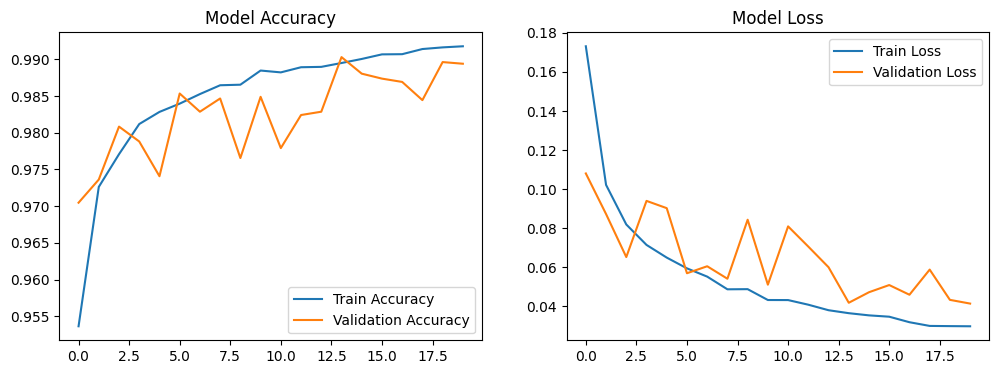


--- Step 6: Visualizing Ante-hoc Explanations (Attention Weights) ---


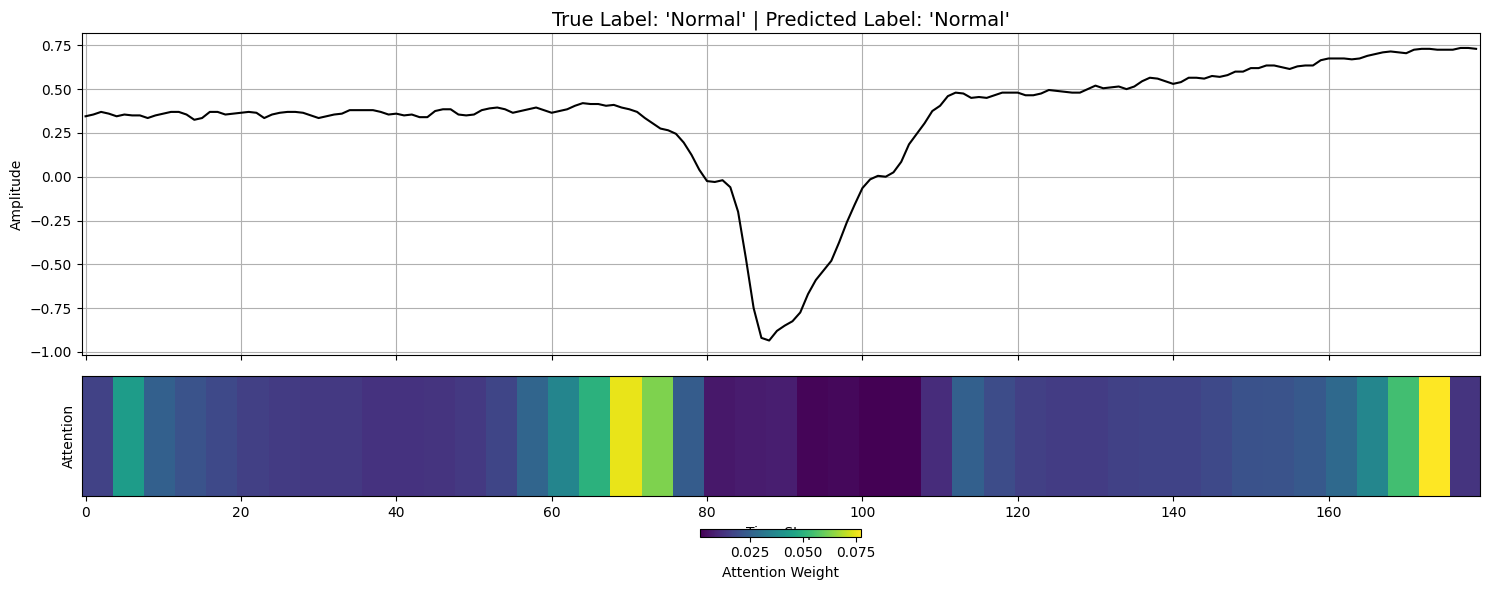

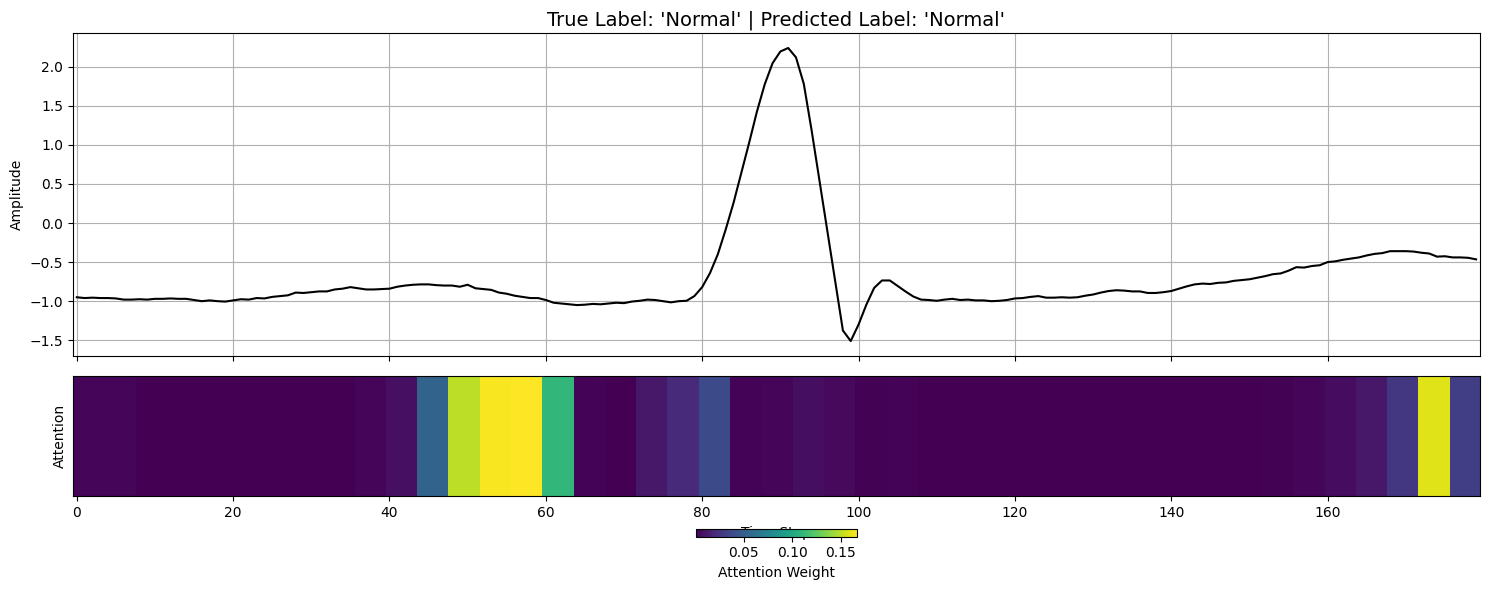

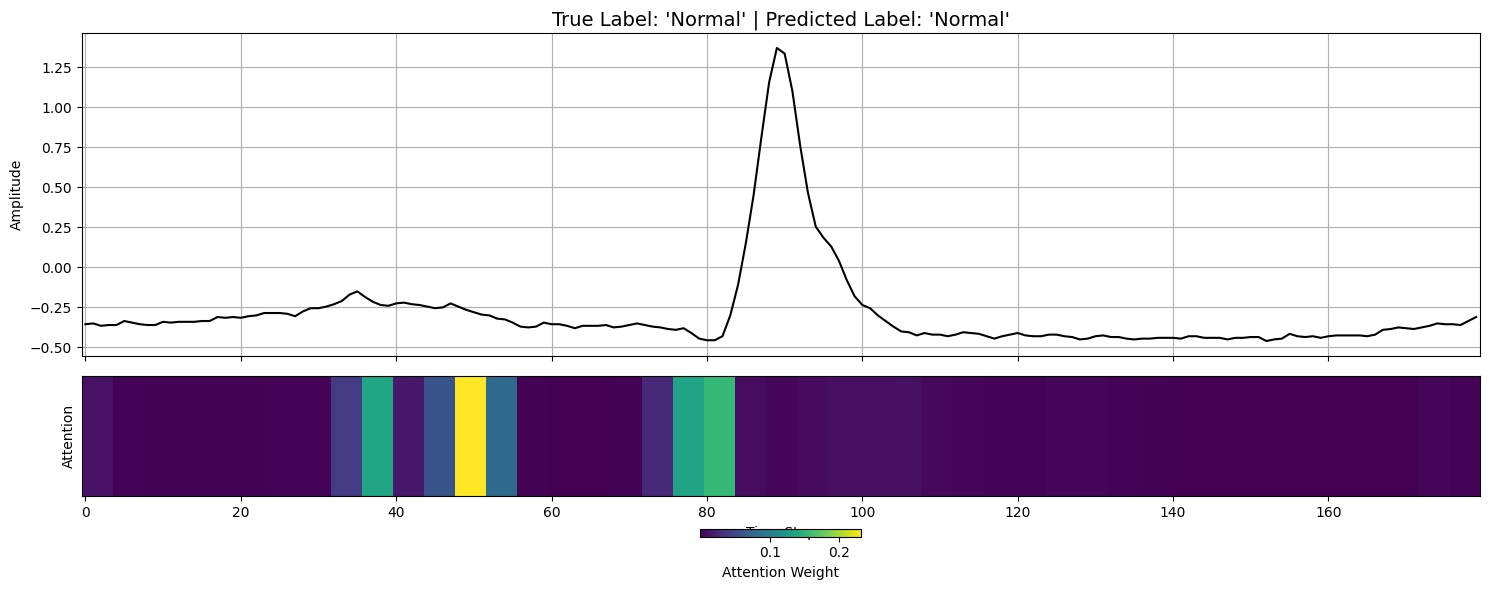

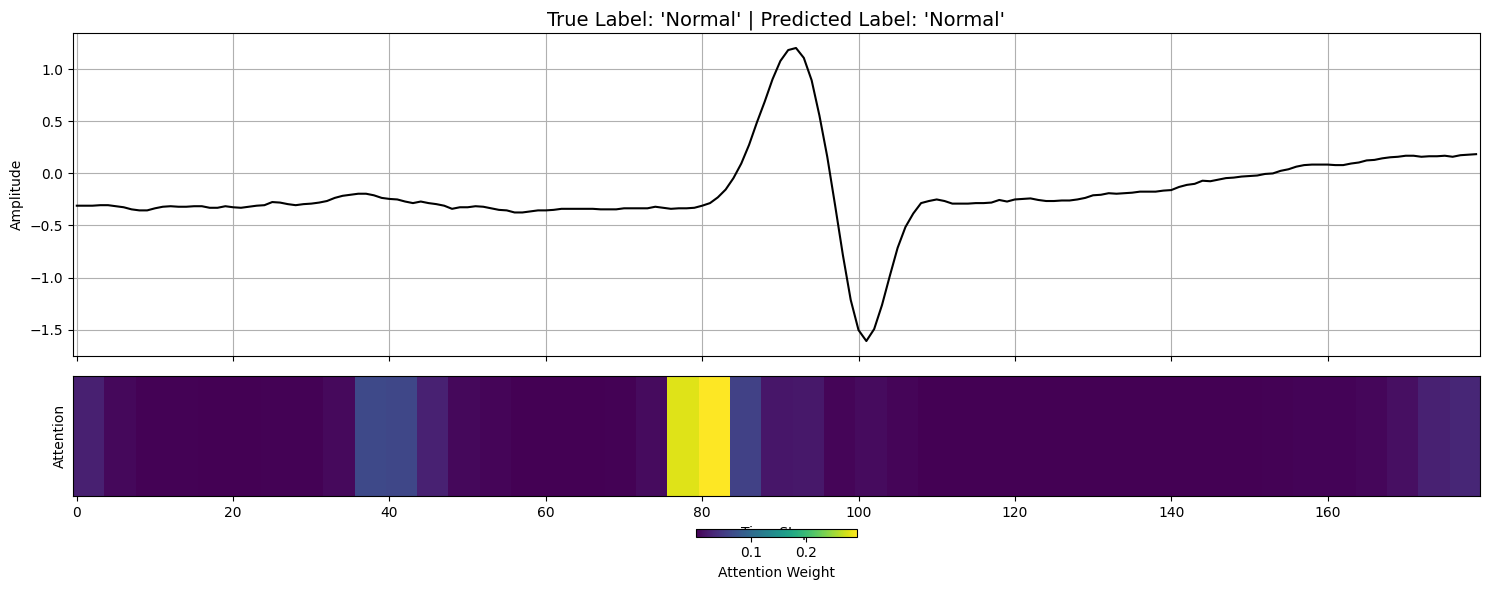

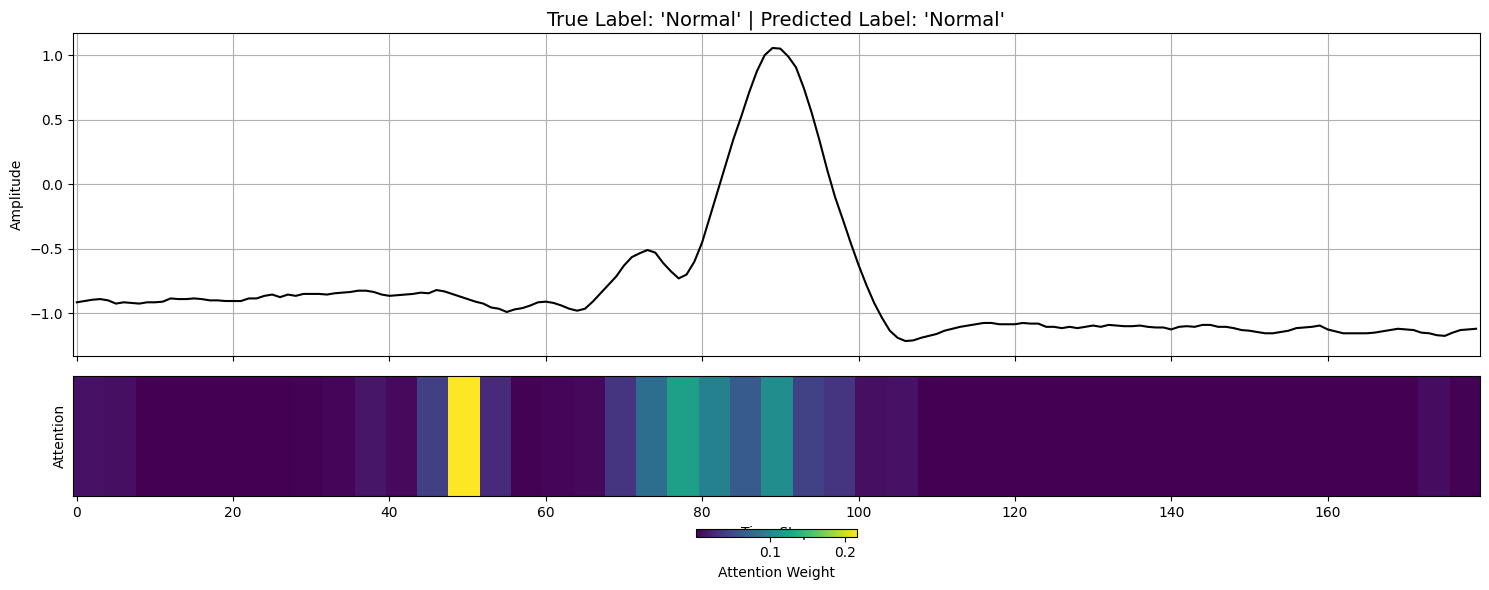


--- Step 7: Performing Fairness Analysis ---

  PERFORMANCE BY SEX

Accuracy for Male subjects: 99.00% (7479 samples)
                       precision    recall  f1-score   support

               Normal       0.99      1.00      0.99      6867
     Atrial Premature       0.96      0.74      0.84       159
Ventricular Premature       0.97      0.96      0.97       453

             accuracy                           0.99      7479
            macro avg       0.97      0.90      0.93      7479
         weighted avg       0.99      0.99      0.99      7479


Accuracy for Female subjects: 99.58% (3613 samples)
                       precision    recall  f1-score   support

               Normal       1.00      1.00      1.00      3101
     Atrial Premature       0.97      0.88      0.93        42
Ventricular Premature       0.99      0.99      0.99       470

             accuracy                           1.00      3613
            macro avg       0.99      0.96      0.97      3613
    

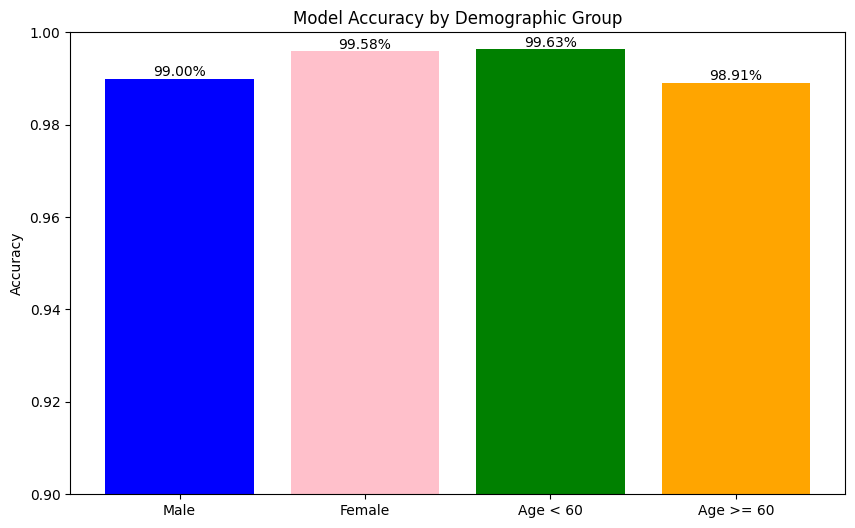

In [ ]:
# ==============================================================================
# STEP 5: EVALUATION (UPDATED)
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 5: Evaluating the Attention Model ---")

    # <<!! FIX !!>>
    # Using return_dict=True provides a robust way to access metrics by name,
    # avoiding index-based errors entirely.
    results = attention_model.evaluate(X_test, {'main_output': y_test}, verbose=0, return_dict=True)

    print(f"Overall Test Accuracy: {results['main_output_accuracy']*100:.2f}%")

    # The history keys for loss are simplified to 'loss' and 'val_loss' because
    # only one output has a loss being tracked. The metric keys remain prefixed.
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['main_output_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_main_output_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.savefig(os.path.join(SAVE_DIR, 'attention_training_history.png'))
    plt.show()

# ==============================================================================
# STEP 6: ATTENTION VISUALIZATION (ANTE-HOC EXPLAINABILITY)
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 6: Visualizing Ante-hoc Explanations (Attention Weights) ---")

    predictions, attention_maps = attention_model.predict(X_test, verbose=0)

    def plot_attention_explanation(ecg_sample, attention_weights, class_names, true_label, pred_label):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
        ax1.plot(ecg_sample, color='black')
        ax1.set_title(f"True Label: '{true_label}' | Predicted Label: '{pred_label}'", fontsize=14)
        ax1.set_ylabel('Amplitude')
        ax1.grid(True)
        attention_resized = np.repeat(attention_weights, 4)
        if len(attention_resized) < len(ecg_sample):
            padding = len(ecg_sample) - len(attention_resized)
            attention_resized = np.pad(attention_resized, (0, padding), 'edge')
        im = ax2.imshow(attention_resized[np.newaxis, :], cmap='viridis', aspect='auto')
        ax2.set_xlabel('Time Step')
        ax2.set_yticks([])
        ax2.set_ylabel('Attention')
        cbar = fig.colorbar(im, ax=ax2, orientation='horizontal', fraction=0.05, pad=0.2)
        cbar.set_label('Attention Weight')
        plt.tight_layout()
        plt.show()
        return fig

    class_names = ['Normal', 'Atrial Premature', 'Ventricular Premature']
    num_samples_to_show = 5

    for i in range(num_samples_to_show):
        sample_ecg = X_test[i].flatten()
        sample_attention = attention_maps[i]
        true_class_index = np.argmax(y_test[i])
        pred_class_index = np.argmax(predictions[i])

        fig = plot_attention_explanation(
            ecg_sample=sample_ecg,
            attention_weights=sample_attention,
            class_names=class_names,
            true_label=class_names[true_class_index],
            pred_label=class_names[pred_class_index]
        )
        fig.savefig(os.path.join(SAVE_DIR, f'attention_explanation_sample_{i}.png'))


# ==============================================================================
# STEP 7: FAIRNESS ANALYSIS (NEW STEP)
# ==============================================================================
if 'X_train' in locals():
    print("\n--- Step 7: Performing Fairness Analysis ---")

    # Get model predictions
    y_pred_probs, _ = attention_model.predict(X_test, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)

    class_names = ['Normal', 'Atrial Premature', 'Ventricular Premature']

    # --- Analysis by Sex ---
    print("\n" + "="*30)
    print("  PERFORMANCE BY SEX")
    print("="*30)

    male_indices = np.where(sex_test == 'M')[0]
    female_indices = np.where(sex_test == 'F')[0]

    acc_male = accuracy_score(y_true_labels[male_indices], y_pred_labels[male_indices])
    acc_female = accuracy_score(y_true_labels[female_indices], y_pred_labels[female_indices])

    print(f"\nAccuracy for Male subjects: {acc_male*100:.2f}% ({len(male_indices)} samples)")
    print(classification_report(y_true_labels[male_indices], y_pred_labels[male_indices], target_names=class_names))

    print(f"\nAccuracy for Female subjects: {acc_female*100:.2f}% ({len(female_indices)} samples)")
    print(classification_report(y_true_labels[female_indices], y_pred_labels[female_indices], target_names=class_names))

    # --- Analysis by Age Group ---
    print("\n" + "="*30)
    print("  PERFORMANCE BY AGE GROUP")
    print("="*30)

    # Define age groups
    age_under_60_indices = np.where(age_test < 60)[0]
    age_60_plus_indices = np.where(age_test >= 60)[0]

    acc_under_60 = accuracy_score(y_true_labels[age_under_60_indices], y_pred_labels[age_under_60_indices])
    acc_60_plus = accuracy_score(y_true_labels[age_60_plus_indices], y_pred_labels[age_60_plus_indices])

    print(f"\nAccuracy for Age < 60: {acc_under_60*100:.2f}% ({len(age_under_60_indices)} samples)")
    print(classification_report(y_true_labels[age_under_60_indices], y_pred_labels[age_under_60_indices], target_names=class_names))

    print(f"\nAccuracy for Age >= 60: {acc_60_plus*100:.2f}% ({len(age_60_plus_indices)} samples)")
    print(classification_report(y_true_labels[age_60_plus_indices], y_pred_labels[age_60_plus_indices], target_names=class_names))

    # --- Visualization of Fairness Analysis ---
    groups = ['Male', 'Female', 'Age < 60', 'Age >= 60']
    accuracies = [acc_male, acc_female, acc_under_60, acc_60_plus]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(groups, accuracies, color=['blue', 'pink', 'green', 'orange'])
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy by Demographic Group')
    plt.ylim(0.9, 1.0) # Zoom in on the top range for better visibility
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval*100:.2f}%', va='bottom', ha='center')

    plt.savefig(os.path.join(SAVE_DIR, 'fairness_analysis.png'))
    plt.show()



--- Step 8: Performing Robustness Analysis ---

  MODEL ACCURACY UNDER NOISY CONDITIONS
Clean Data Accuracy:      99.19%
Baseline Wander Accuracy: 99.15%
Muscle Artifact Accuracy: 95.73%

  EXPLANATION STABILITY ANALYSIS

Comparing explanations for a sample PVC beat (Index: 15)...


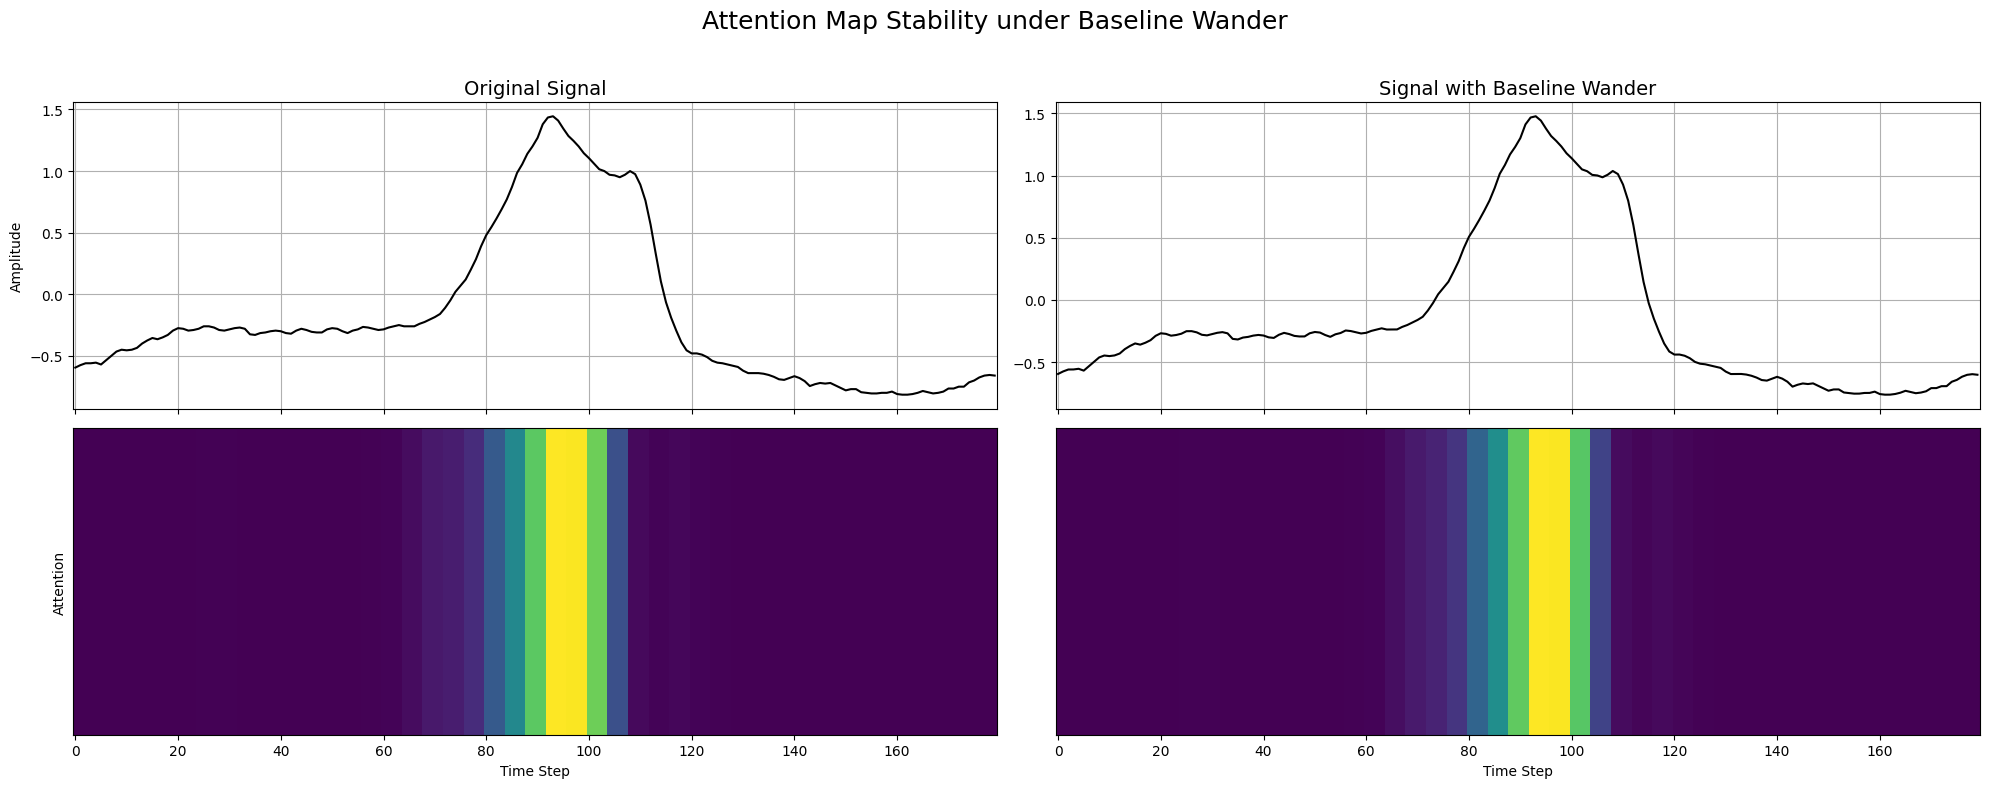

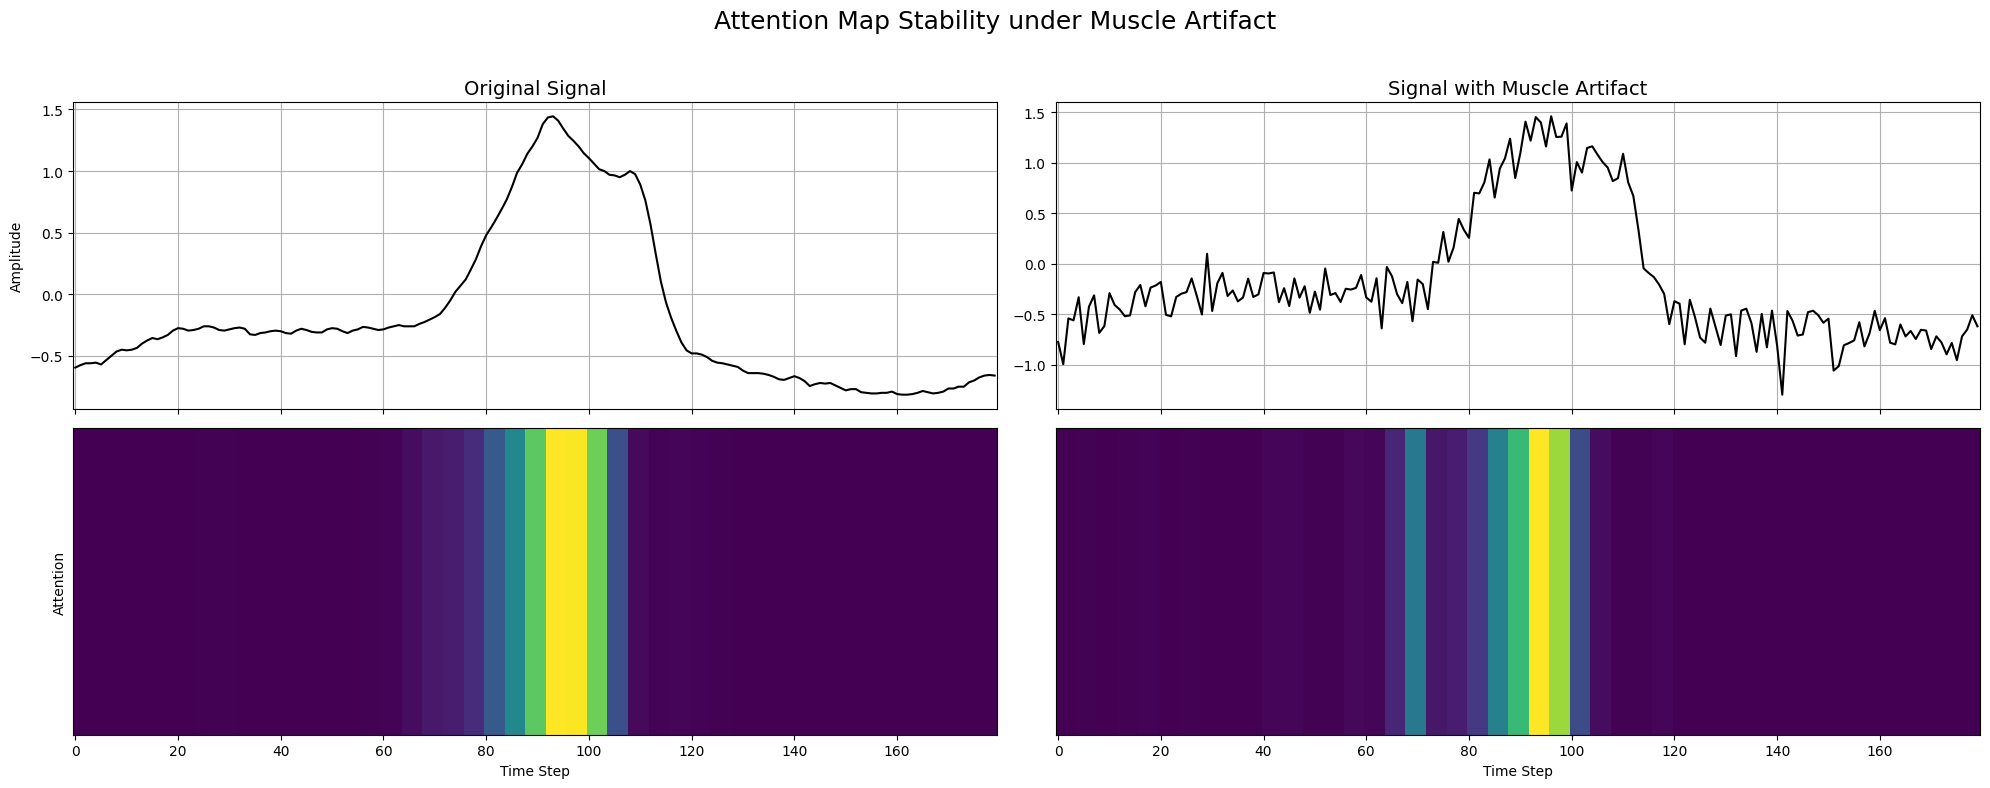

In [ ]:
# ==============================================================================
# STEP 8: ROBUSTNESS ANALYSIS (NEW STEP)
# ==============================================================================
def add_baseline_wander(signal, fs=360, amplitude=0.1, freq=0.2):
    """Adds a low-frequency sine wave to simulate baseline wander."""
    t = np.arange(len(signal)) / fs
    wander = amplitude * np.sin(2 * np.pi * freq * t)
    return signal + wander

def add_muscle_artifact(signal, amplitude=0.15):
    """Adds high-frequency random noise to simulate muscle artifacts."""
    noise = amplitude * np.random.randn(len(signal))
    return signal + noise

def plot_robustness_comparison(original_sample, noisy_sample, original_att, noisy_att, noise_type):
    """Plots a side-by-side comparison of explanations on clean vs. noisy data."""
    fig, axes = plt.subplots(2, 2, figsize=(20, 8), sharex=True)

    # --- Original ---
    axes[0, 0].plot(original_sample, color='black')
    axes[0, 0].set_title('Original Signal', fontsize=14)
    axes[0, 0].set_ylabel('Amplitude')
    axes[0, 0].grid(True)

    im1 = axes[1, 0].imshow(np.repeat(original_att, 4)[np.newaxis, :], cmap='viridis', aspect='auto')
    axes[1, 0].set_xlabel('Time Step')
    axes[1, 0].set_yticks([])
    axes[1, 0].set_ylabel('Attention')

    # --- Noisy ---
    axes[0, 1].plot(noisy_sample, color='black')
    axes[0, 1].set_title(f'Signal with {noise_type}', fontsize=14)
    axes[0, 1].grid(True)

    im2 = axes[1, 1].imshow(np.repeat(noisy_att, 4)[np.newaxis, :], cmap='viridis', aspect='auto')
    axes[1, 1].set_xlabel('Time Step')
    axes[1, 1].set_yticks([])

    fig.suptitle(f'Attention Map Stability under {noise_type}', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    return fig

if 'X_train' in locals():
    print("\n--- Step 8: Performing Robustness Analysis ---")

    # --- Test Accuracy on Noisy Data ---
    X_test_wander = np.array([add_baseline_wander(x.flatten()) for x in X_test]).reshape(X_test.shape)
    X_test_muscle = np.array([add_muscle_artifact(x.flatten()) for x in X_test]).reshape(X_test.shape)

    results_clean = attention_model.evaluate(X_test, {'main_output': y_test}, verbose=0, return_dict=True)
    results_wander = attention_model.evaluate(X_test_wander, {'main_output': y_test}, verbose=0, return_dict=True)
    results_muscle = attention_model.evaluate(X_test_muscle, {'main_output': y_test}, verbose=0, return_dict=True)

    print("\n" + "="*40)
    print("  MODEL ACCURACY UNDER NOISY CONDITIONS")
    print("="*40)
    print(f"Clean Data Accuracy:      {results_clean['main_output_accuracy']*100:.2f}%")
    print(f"Baseline Wander Accuracy: {results_wander['main_output_accuracy']*100:.2f}%")
    print(f"Muscle Artifact Accuracy: {results_muscle['main_output_accuracy']*100:.2f}%")

    # --- Visualize Explanation Stability ---
    print("\n" + "="*40)
    print("  EXPLANATION STABILITY ANALYSIS")
    print("="*40)

    # Find a PVC beat to analyze, as it's a good example
    pvc_idx = np.where(np.argmax(y_test, axis=1) == 2)[0]
    if len(pvc_idx) > 0:
      sample_idx = pvc_idx[0]

      # Get clean data and explanation
      clean_sample = X_test[sample_idx].flatten()
      clean_pred_prob, clean_att_map = attention_model.predict(clean_sample.reshape(1, -1, 1), verbose=0)

      # Get baseline wander data and explanation
      wander_sample = add_baseline_wander(clean_sample)
      wander_pred_prob, wander_att_map = attention_model.predict(wander_sample.reshape(1, -1, 1), verbose=0)

      # Get muscle artifact data and explanation
      muscle_sample = add_muscle_artifact(clean_sample)
      muscle_pred_prob, muscle_att_map = attention_model.predict(muscle_sample.reshape(1, -1, 1), verbose=0)

      # Plot comparisons
      print(f"\nComparing explanations for a sample PVC beat (Index: {sample_idx})...")

      fig_wander = plot_robustness_comparison(
          clean_sample, wander_sample, clean_att_map[0], wander_att_map[0], "Baseline Wander"
      )
      fig_wander.savefig(os.path.join(SAVE_DIR, 'robustness_wander_comparison.png'))

      fig_muscle = plot_robustness_comparison(
          clean_sample, muscle_sample, clean_att_map[0], muscle_att_map[0], "Muscle Artifact"
      )
      fig_muscle.savefig(os.path.join(SAVE_DIR, 'robustness_muscle_comparison.png'))
    else:
        print("No PVC samples found in the test set for detailed robustness visualization.")




--- Step 9: Performing Post-hoc Explainability Analysis with SHAP ---
Initializing SHAP explainer...
Calculating SHAP values for 5 samples (this may take some time)...


  0%|          | 0/5 [00:00<?, ?it/s]


Displaying SHAP explanations for test samples...
Sample 0 - SHAP min: -0.0001, max: 0.0001


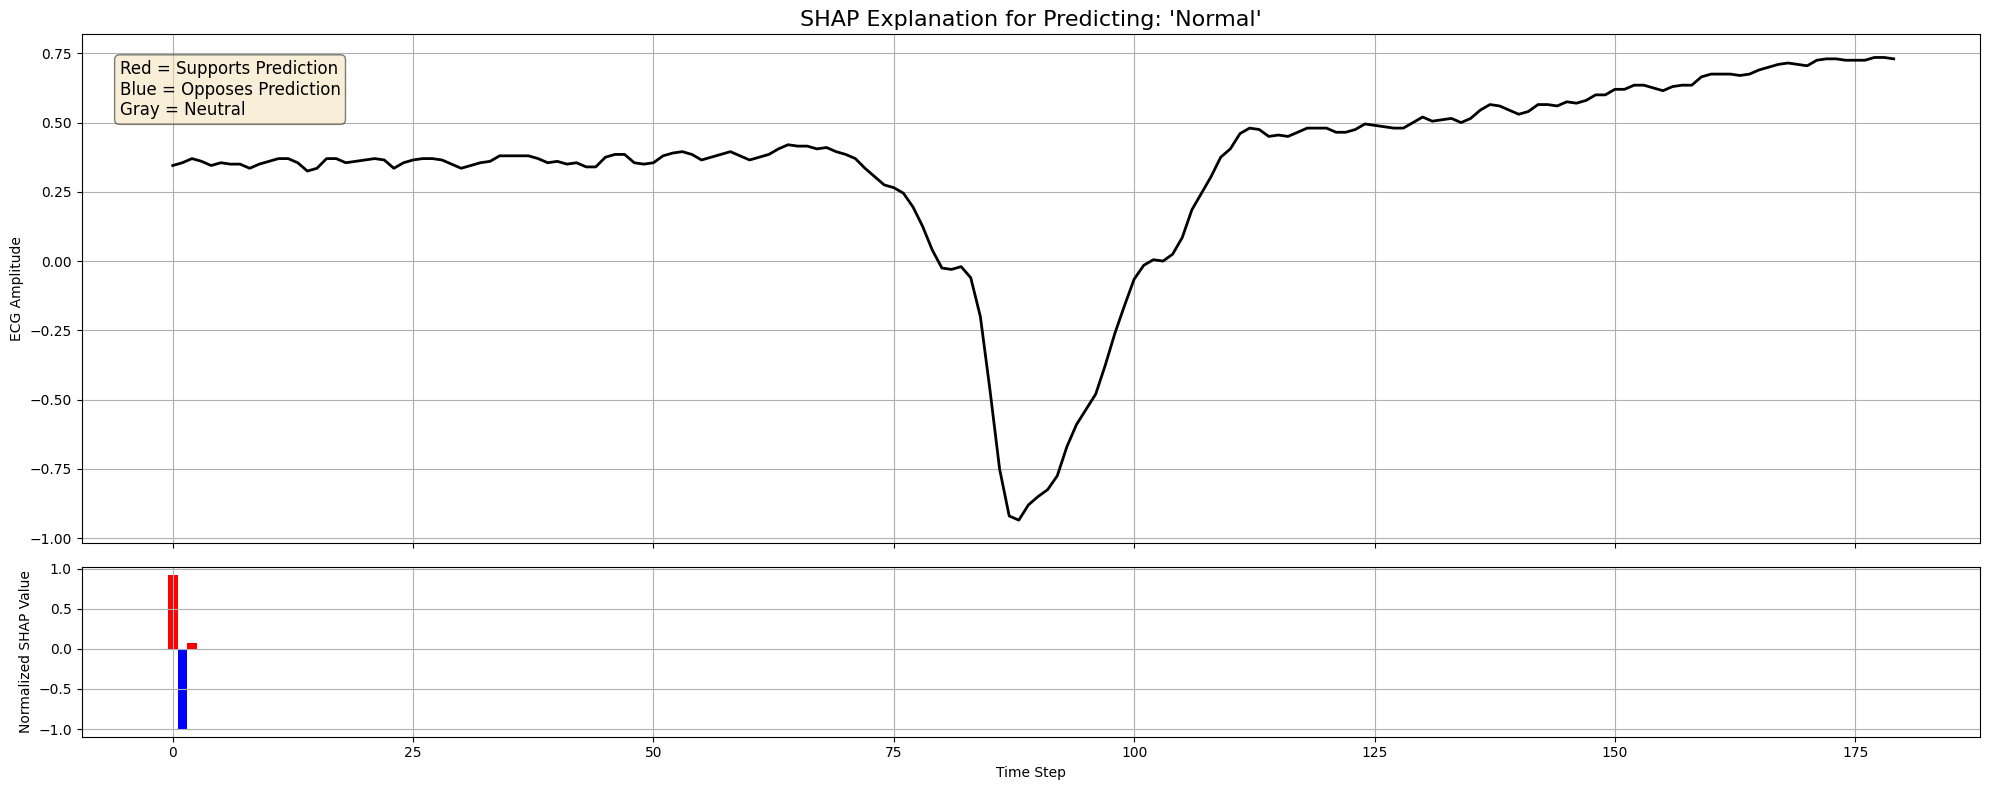

Sample 1 - SHAP min: -0.0003, max: 0.0002


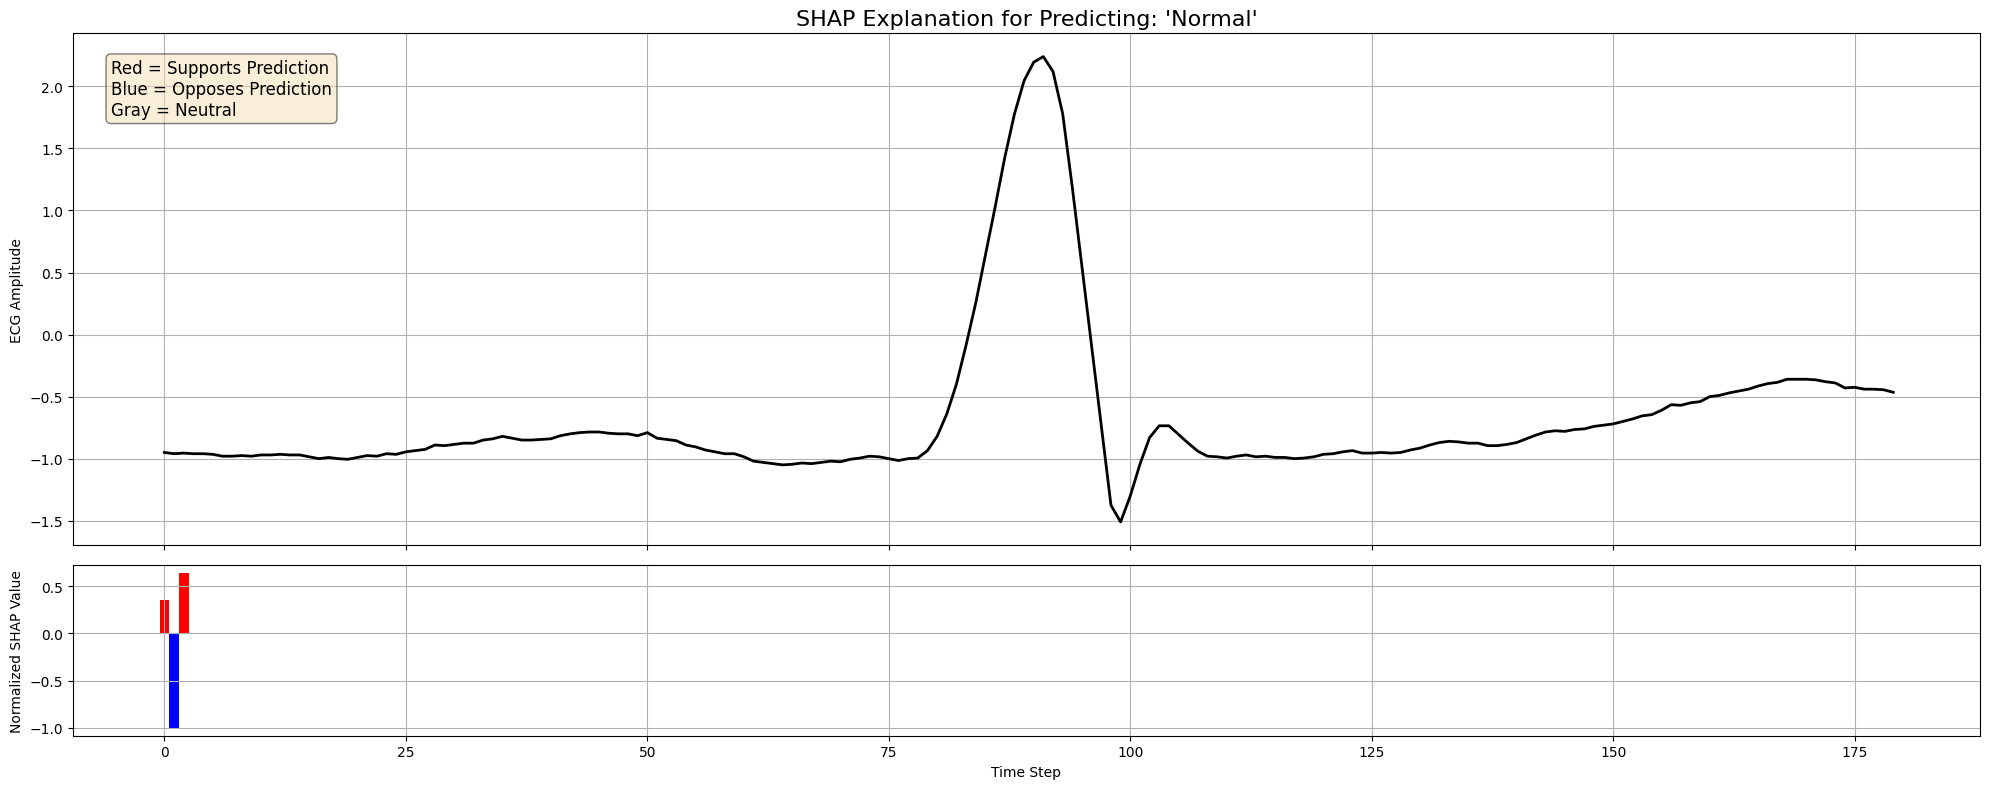

Sample 2 - SHAP min: -0.0104, max: 0.0108


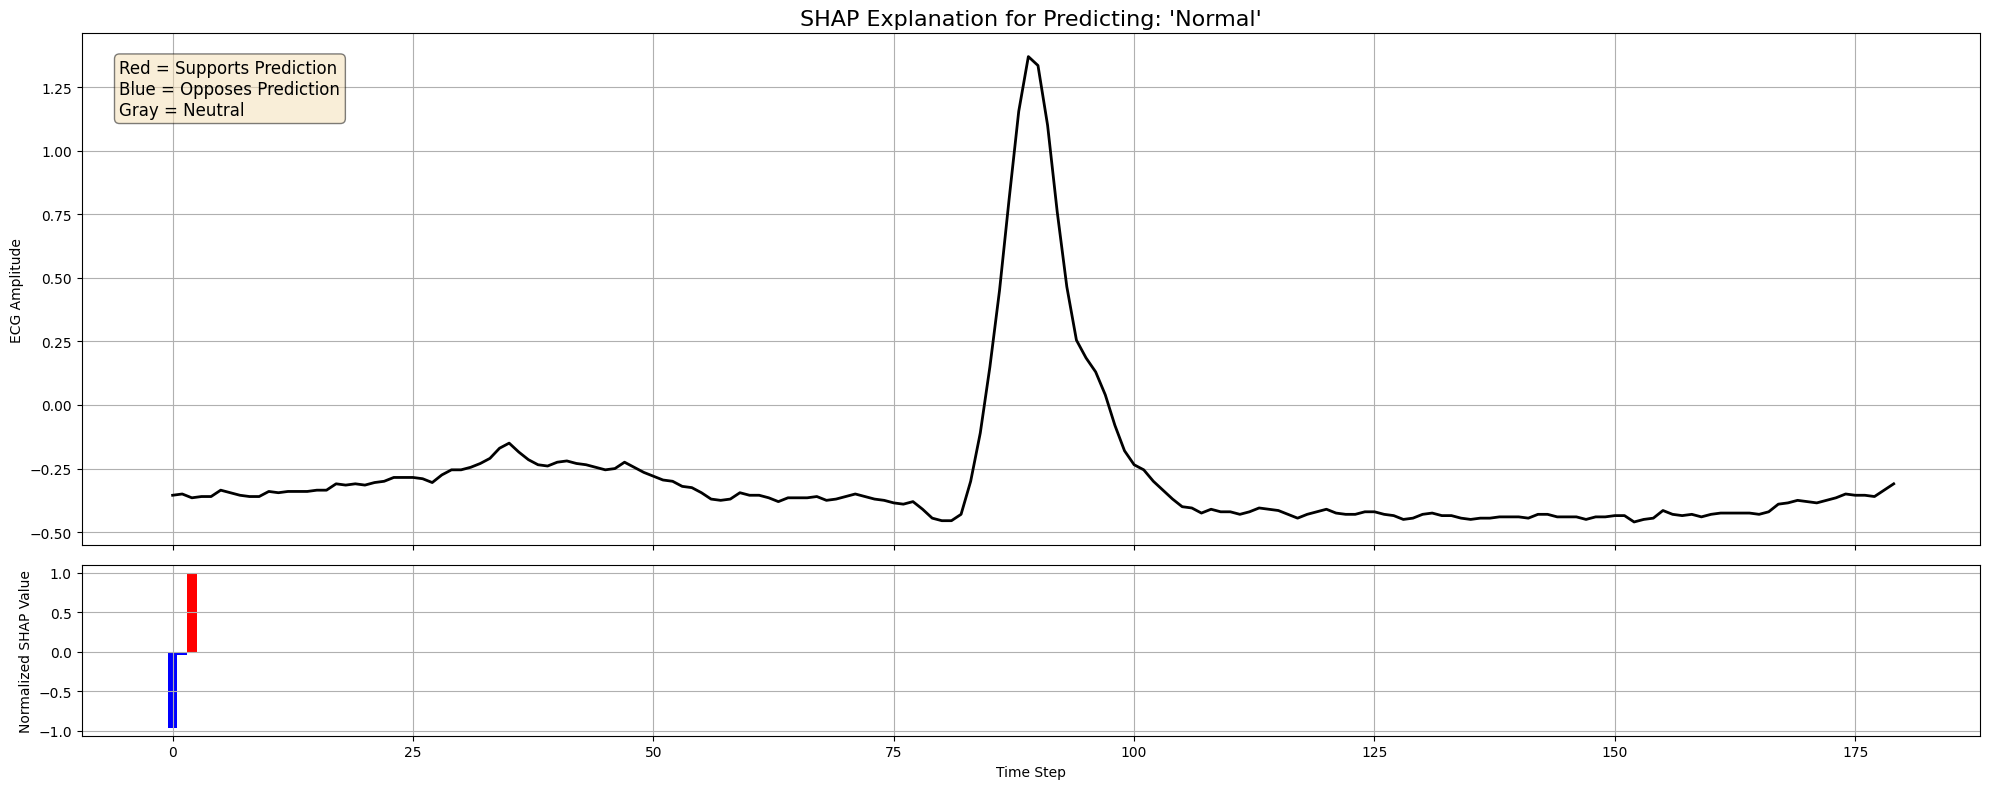

Sample 3 - SHAP min: -0.0017, max: 0.0013


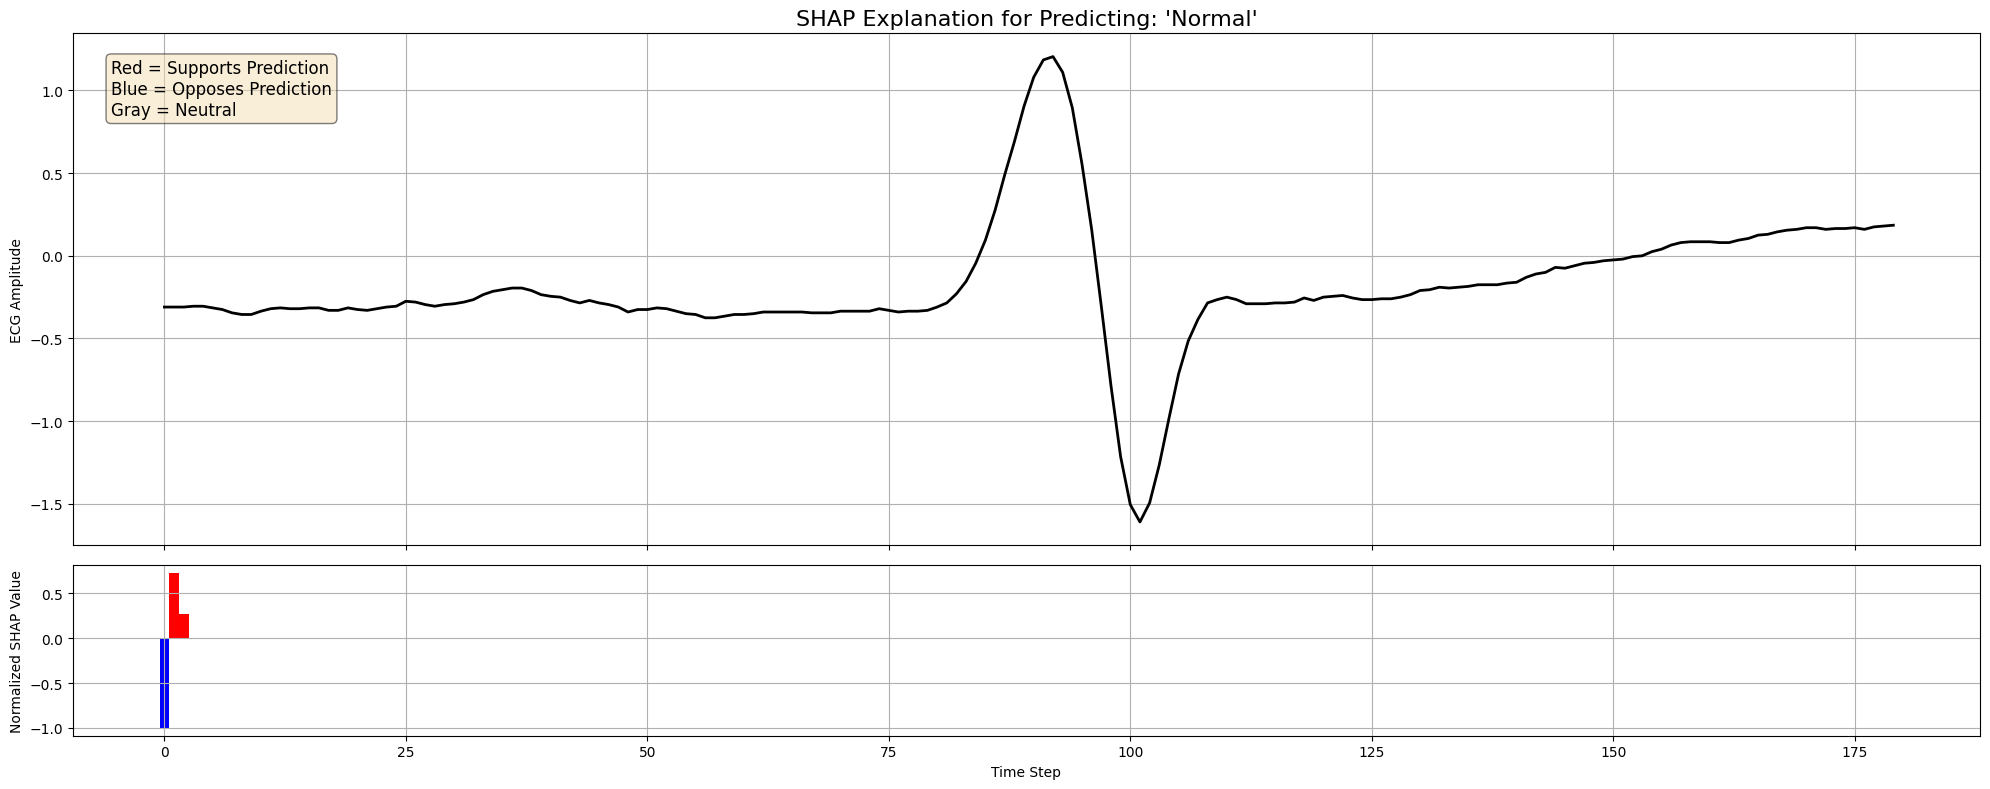

Sample 4 - SHAP min: -0.0011, max: 0.0009


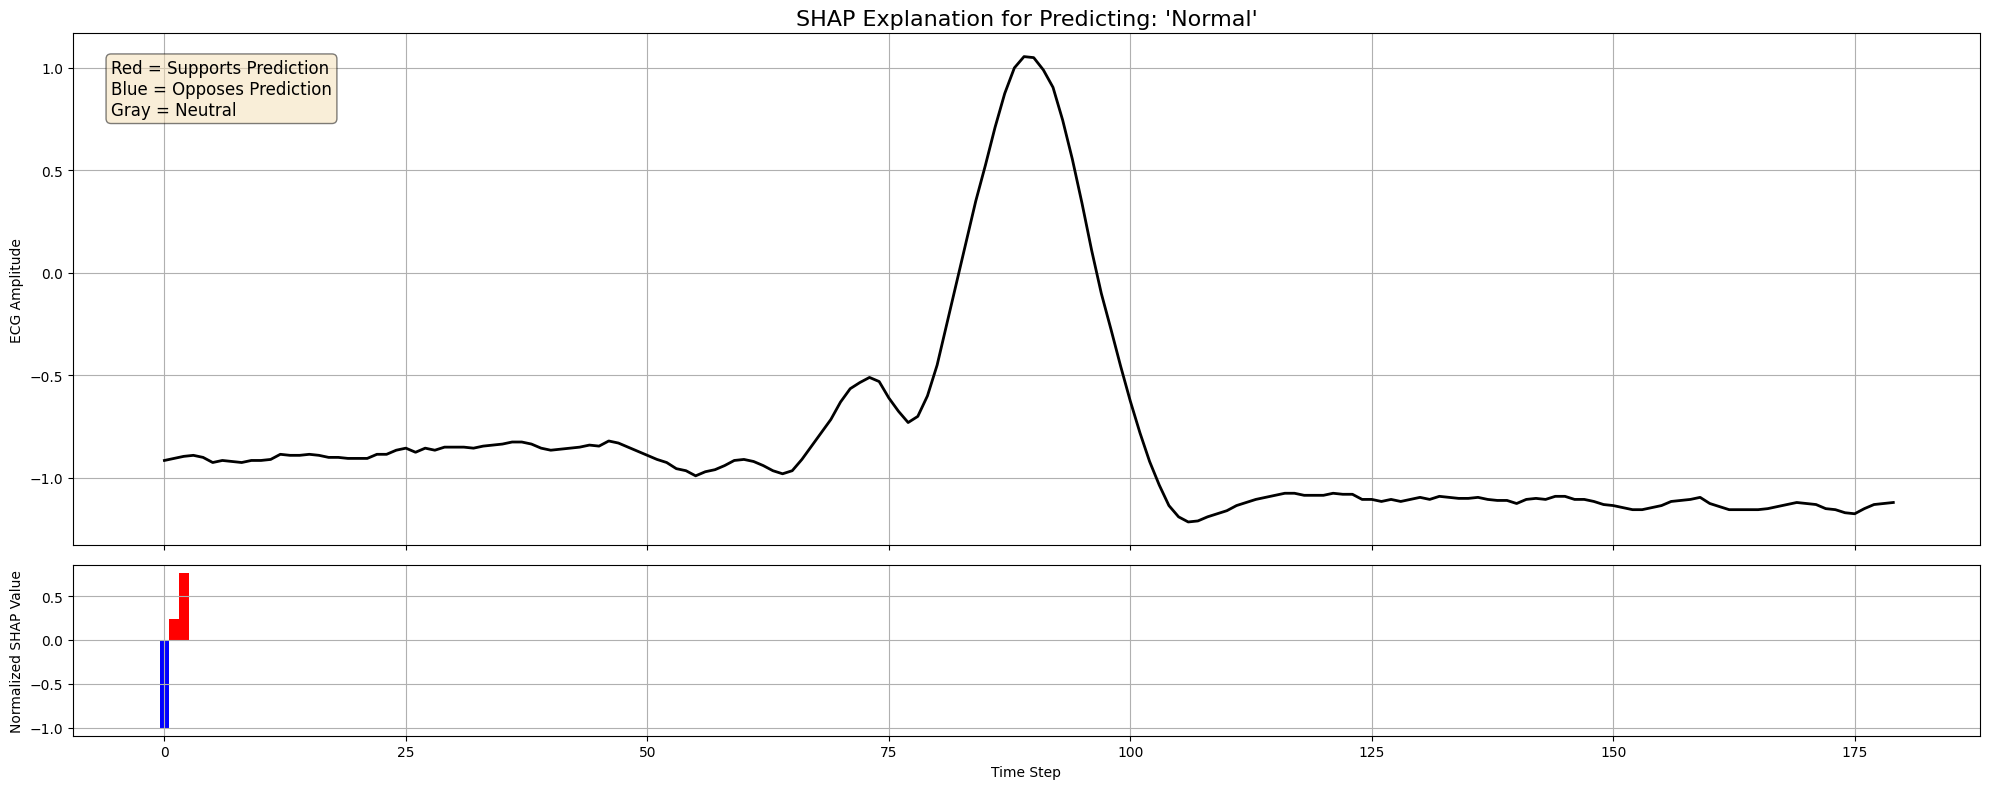

✅ SHAP explanation plots saved successfully.


In [ ]:
# ==============================================================================
# STEP 9: POST-HOC EXPLAINABILITY (SHAP) using KernelExplainer or SamplingExplainer
# ==============================================================================

!pip install --upgrade shap --quiet
import shap
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model

if 'X_train' in locals():
    print("\n--- Step 9: Performing Post-hoc Explainability Analysis with SHAP ---")

    # Get model output
    shap_model = Model(inputs=attention_model.inputs, outputs=attention_model.outputs[0])

    # Parameters
    num_shap_samples = 5
    num_background = 200  # More = better SHAP, but slower

    # Select background and test samples
    background = X_train[np.random.choice(X_train.shape[0], num_background, replace=False)]
    X_explain = X_test[:num_shap_samples]

    # Flatten input: (samples, timesteps, 1) → (samples, timesteps)
    background_flat = background.reshape((background.shape[0], background.shape[1]))
    X_explain_flat = X_explain.reshape((X_explain.shape[0], X_explain.shape[1]))

    # Define prediction function that reshapes input back to 3D
    def predict_fn(x_flat):
        x_reshaped = x_flat.reshape((-1, background.shape[1], 1))
        return shap_model.predict(x_reshaped, verbose=0)

    print("Initializing SHAP explainer...")
    explainer = shap.SamplingExplainer(predict_fn, background_flat)
    # You can switch back to KernelExplainer if needed:
    # explainer = shap.KernelExplainer(predict_fn, background_flat)

    print(f"Calculating SHAP values for {num_shap_samples} samples (this may take some time)...")
    shap_values = explainer.shap_values(X_explain_flat, nsamples=1000)  # Increase for better results

    # ---------------------------- PLOTTING FUNCTION ----------------------------
    def plot_shap_explanation(shap_values, features, sample_index, class_names):
        prediction = shap_model.predict(features[sample_index:sample_index+1], verbose=0)
        predicted_class_index = np.argmax(prediction)

        shap_vals_sample = shap_values[predicted_class_index][sample_index].flatten()
        features_sample = features[sample_index].flatten()

        # Debug SHAP value stats
        print(f"Sample {sample_index} - SHAP min: {shap_vals_sample.min():.4f}, max: {shap_vals_sample.max():.4f}")

        # Normalize SHAP values for visibility
        max_abs_val = np.max(np.abs(shap_vals_sample))
        if max_abs_val > 0:
            shap_vals_sample = shap_vals_sample / max_abs_val
        else:
            print("⚠️ Warning: SHAP values are all zeros for this sample.")

        # Assign colors
        colors = ['red' if val > 1e-6 else 'blue' if val < -1e-6 else 'gray' for val in shap_vals_sample]

        # Plotting
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
        ax1.plot(features_sample, color='black', linewidth=2)
        ax1.set_title(f"SHAP Explanation for Predicting: '{class_names[predicted_class_index]}'", fontsize=16)
        ax1.set_ylabel('ECG Amplitude')
        ax1.grid(True)

        ax2.bar(range(len(shap_vals_sample)), shap_vals_sample, color=colors, width=1.0)
        ax2.set_xlabel('Time Step')
        ax2.set_ylabel('Normalized SHAP Value')
        ax2.grid(True)

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax1.text(0.02, 0.95, "Red = Supports Prediction\nBlue = Opposes Prediction\nGray = Neutral",
                 transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props)

        plt.tight_layout()
        return fig

    # -------------------------- DISPLAY AND SAVE PLOTS --------------------------
    print("\nDisplaying SHAP explanations for test samples...")
    for i in range(num_shap_samples):
        fig = plot_shap_explanation(
            shap_values=shap_values,
            features=X_explain,
            sample_index=i,
            class_names=class_names
        )
        fig.savefig(os.path.join(SAVE_DIR, f'shap_explanation_sample_{i}.png'))
        plt.show()

    print("✅ SHAP explanation plots saved successfully.")


In [ ]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.0 MB/s eta 0:00:00


In [ ]:
#app.py
import streamlit as st
import numpy as np
import shap
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import json

# Load model and data
model = load_model("model.h5", compile=False)
X_test = np.load("data/X_test.npy")  # Shape: (samples, timesteps, 1)
class_names = json.load(open("data/class_names.json"))

# SHAP setup
background = X_test[np.random.choice(X_test.shape[0], 200, replace=False)]
background_flat = background.reshape((background.shape[0], background.shape[1]))

def predict_fn(x_flat):
    x_reshaped = x_flat.reshape((-1, background.shape[1], 1))
    return model.predict(x_reshaped, verbose=0)

explainer = shap.SamplingExplainer(predict_fn, background_flat)

# Streamlit UI
st.title("Clinician-Facing ECG Explanation Dashboard")

sample_index = st.slider("Select Test Sample", 0, X_test.shape[0] - 1, 0)

# Fetch data
X_sample = X_test[sample_index:sample_index + 1]
X_sample_flat = X_sample.reshape((1, -1))
prediction = model.predict(X_sample, verbose=0)[0]
predicted_class = np.argmax(prediction)

st.subheader("Model Prediction")
st.write(f"**Predicted Class:** {class_names[predicted_class]}")
st.write(f"**Class Probabilities:**")
st.bar_chart(prediction)

st.subheader("Raw ECG Signal")
fig1, ax = plt.subplots(figsize=(12, 3))
ax.plot(X_sample.flatten(), color="black")
ax.set_xlabel("Time")
ax.set_ylabel("ECG Amplitude")
st.pyplot(fig1)

st.subheader("SHAP Explanation")
shap_values = explainer.shap_values(X_sample_flat, nsamples=1000)
shap_vals_sample = shap_values[predicted_class][0]
max_val = np.max(np.abs(shap_vals_sample))
norm_vals = shap_vals_sample / max_val if max_val > 0 else shap_vals_sample
colors = ['red' if val > 1e-6 else 'blue' if val < -1e-6 else 'gray' for val in norm_vals]

fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax1.plot(X_sample.flatten(), color='black')
ax1.set_title(f"SHAP Explanation for Class: '{class_names[predicted_class]}'")
ax1.set_ylabel("ECG Amplitude")
ax1.grid(True)

ax2.bar(range(len(norm_vals)), norm_vals, color=colors, width=1.0)
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Normalized SHAP")
ax2.grid(True)

st.pyplot(fig2)
